In [1]:
pip install astroML


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import astroML.datasets as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
dir(ad)

['LIGO_bigdog',
 'LINEAR_sample',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'dr7_quasar',
 'fetch_LIGO_bigdog',
 'fetch_LIGO_large',
 'fetch_LINEAR_geneva',
 'fetch_LINEAR_sample',
 'fetch_dr7_quasar',
 'fetch_great_wall',
 'fetch_hogg2010test',
 'fetch_imaging_sample',
 'fetch_moving_objects',
 'fetch_nasa_atlas',
 'fetch_rrlyrae_combined',
 'fetch_rrlyrae_mags',
 'fetch_rrlyrae_templates',
 'fetch_sdss_S82standards',
 'fetch_sdss_corrected_spectra',
 'fetch_sdss_filter',
 'fetch_sdss_galaxy_colors',
 'fetch_sdss_galaxy_images',
 'fetch_sdss_specgals',
 'fetch_sdss_spectrum',
 'fetch_sdss_sspp',
 'fetch_vega_spectrum',
 'fetch_wmap_temperatures',
 'generate_mu_z',
 'generated',
 'get_data_home',
 'hogg2010test',
 'imaging_sample',
 'kelly2007test',
 'moving_objects',
 'nasa_atlas',
 'rrlyrae_mags',
 'rrlyrae_templates',
 'sdss_S82standards',
 'sdss_corrected_spectra',
 'sdss_filters',
 'sdss_galaxy_c

In [27]:
help(ad.fetch_rrlyrae_combined)

Help on function fetch_rrlyrae_combined in module astroML.datasets.rrlyrae_mags:

fetch_rrlyrae_combined(data_home=None, download_if_missing=True)
    Loader for RR-Lyrae combined data
    
    This returns the combined RR-Lyrae colors and SDSS standards colors.
    The RR-Lyrae sample is confirmed through time-domain observations;
    this result in a nice dataset for testing classification routines.
    
    Parameters
    ----------
    data_home : optional, default=None
        Specify another download and cache folder for the datasets. By default
        all astroML data is stored in '~/astroML_data'.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    Returns
    -------
    X : ndarray
        a shape (n_samples, 4) array.  Columns are u-g, g-r, r-i, i-z
    
    y : ndarray
        a shape (n_samples,) array of labels.  1 indicat

In [2]:
X, y = ad.fetch_rrlyrae_combined()
# X = array. Columns are u-g, g-r, r-i, i-z
# y = array of labels. 1 indicates an RR Lyrae, 0 indicates a background star.

In [3]:
print(X)

[[ 1.2509995   0.39400005  0.13700008  0.06199932]
 [ 1.0480003   0.3390007   0.15199852  0.02300072]
 [ 1.0080013   0.34199905  0.12899971  0.20300102]
 ...
 [ 1.0440006   0.2119999   0.03499985  0.00200081]
 [ 1.0649986   0.17200089  0.04199982  0.00300026]
 [ 1.1259995   0.06500053 -0.0170002  -0.05799866]]


In [4]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [5]:
# Create a DataFrame for visualization
data = pd.DataFrame(X, columns=['u-g', 'g-r', 'r-i', 'i-z'])
data['class'] = y

data

,u-g,g-r,r-i,i-z,class
0,1.250999,0.394000,0.137000,0.061999,0.0
1,1.048000,0.339001,0.151999,0.023001,0.0
2,1.008001,0.341999,0.129000,0.203001,0.0
3,0.965000,0.392000,0.149000,0.150000,0.0
4,1.040001,0.333000,0.125999,0.101999,0.0
...,...,...,...,...,...
93136,0.962999,0.059000,-0.025999,-0.025000,1.0
93137,1.059999,0.185001,0.050999,-0.023998,1.0
93138,1.044001,0.212000,0.035000,0.002001,1.0
93139,1.064999,0.172001,0.042000,0.003000,1.0


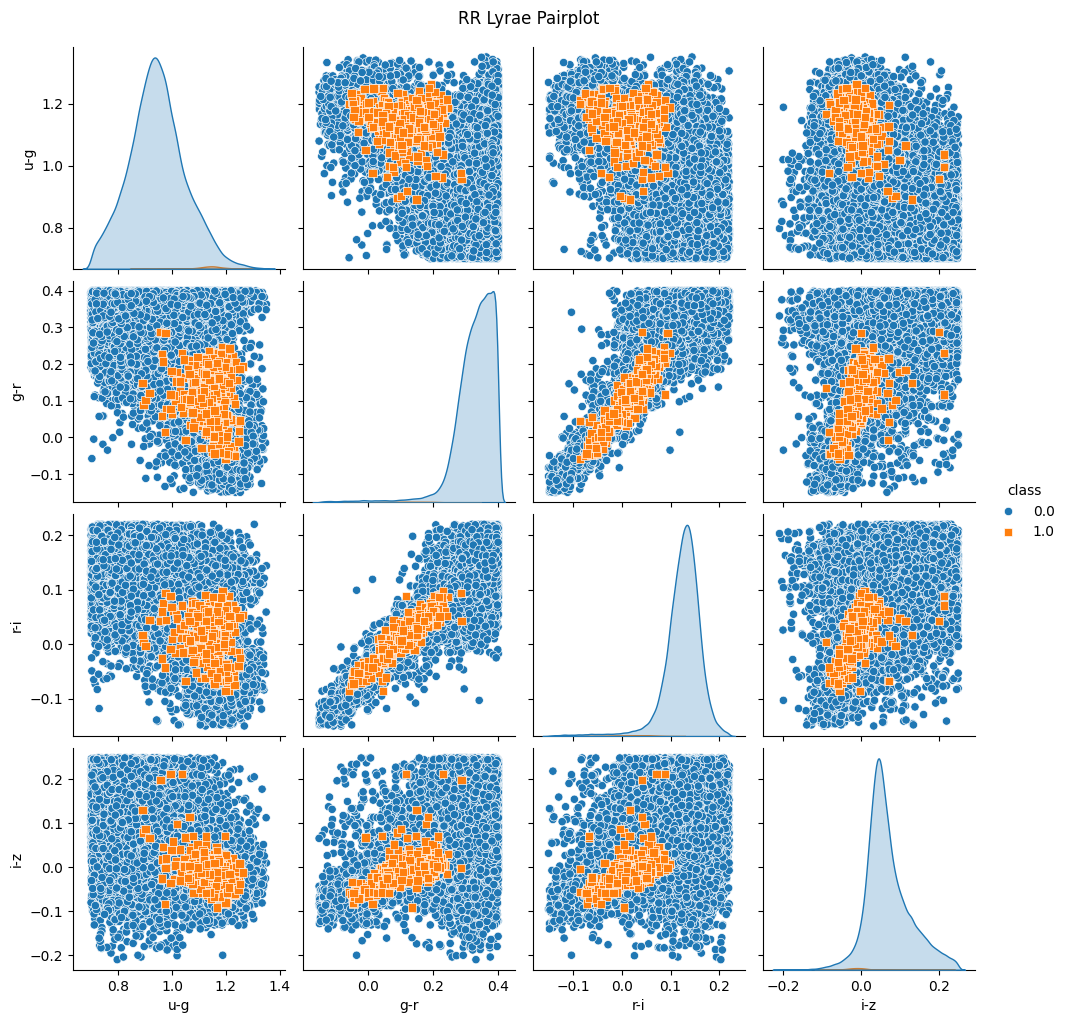

In [6]:
# Pairplot with seaborn
sns.pairplot(data, hue='class', markers=["o", "s"])
plt.suptitle('RR Lyrae Pairplot', y=1.02)
plt.show()

# RR Lyrae Pairplot: Comparison of QDA, GNB, GMM, KNN, and SVM Classification

In [13]:
# Split the data into training and testing sets
X = X[:, :2]  # only use two features for simplicity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Decision Boundary

### Quadratic Discriminant Analysis model (QDA)

In [14]:
# Fit the QDA model
qda = QDA()
qda.fit(X_train, y_train)

# Predict and evaluate the model
qda_y_pred = qda.predict(X_test)
qda_accuracy = np.mean(qda_y_pred == y_test)
print(f'QDA Accuracy: {qda_accuracy:.2f}')

QDA Accuracy: 0.98


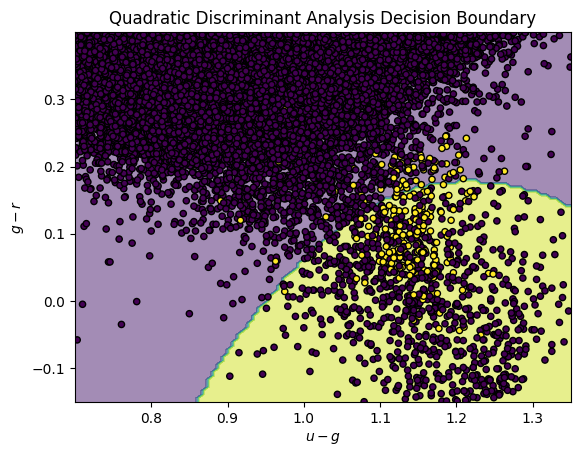

In [15]:
# Define the grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict on the grid points
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$')
plt.title('Quadratic Discriminant Analysis Decision Boundary')
plt.show()

### Gaussian Naive Bayes model (GNB)

In [16]:
# Fit the GNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate the model
gnb_y_pred = gnb.predict(X_test)
gnb_accuracy = np.mean(gnb_y_pred == y_test)
print(f'GNB Accuracy: {gnb_accuracy:.2f}')

GNB Accuracy: 0.98


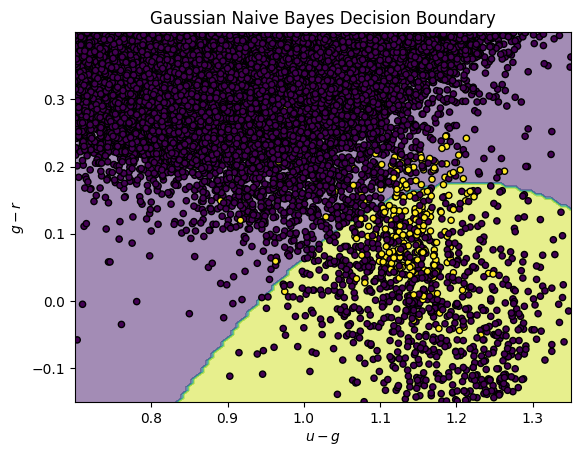

In [17]:
# Define the grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict on the grid points
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$')
plt.title('Gaussian Naive Bayes Decision Boundary')
plt.show()

### GMM and Bayes classification

In [20]:
# Fit the GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)  # since we have 2 classes
gmm.fit(X_train)

# Predict and evaluate the model
probs = gmm.predict_proba(X_test)
gmm_y_pred = np.argmax(probs, axis=1)
gmm_accuracy = np.mean(gmm_y_pred == y_test)
print(f'GMM Accuracy: {gmm_accuracy:.2f}')

GMM Accuracy: 0.95


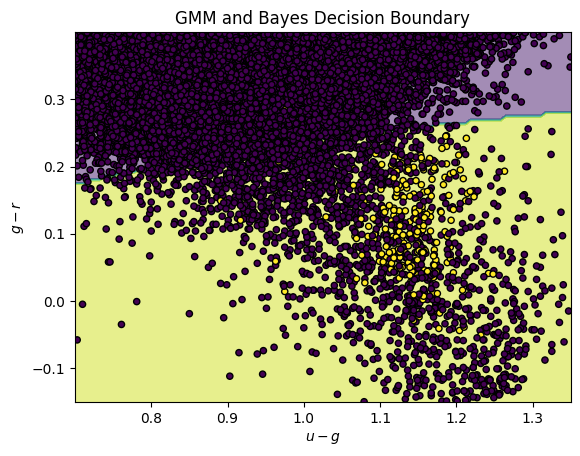

In [22]:
# Define the grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict on the grid points
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$')
plt.title('GMM and Bayes Decision Boundary')
plt.show()

### K-Nearest Neighbours

In [24]:
# k-NN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict and evaluate the model
knn_y_pred = knn.predict(X_test)
knn_accuracy = np.mean(knn_y_pred == y_test)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

KNN Accuracy: 0.99


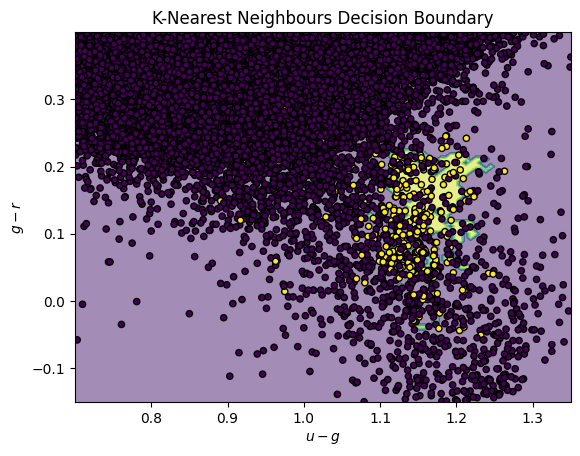

In [25]:
# Define the grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict on the grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$')
plt.title('K-Nearest Neighbours Decision Boundary')
plt.show()

### Support Vector Machines

In [27]:
# Train SVM classifier with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Predict and evaluate the model
svm_y_pred = svm.predict(X_test)
svm_accuracy = np.mean(svm_y_pred == y_test)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

SVM Accuracy: 1.00


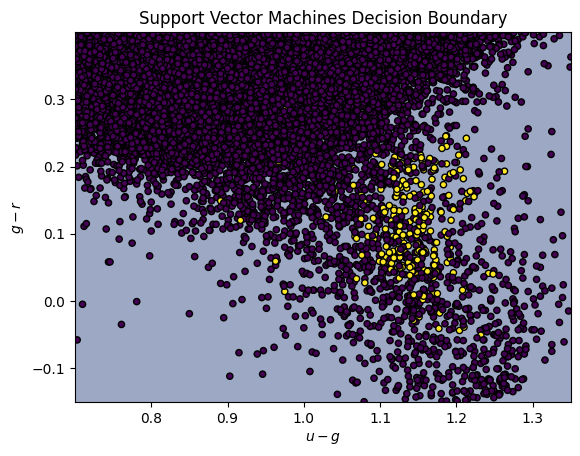

In [28]:
# Define the grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Predict on the grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20)
plt.xlabel('$u-g$')
plt.ylabel('$g-r$')
plt.title('Support Vector Machines Decision Boundary')
plt.show()

# From astroML notebooks chapter 9

## Comparing the performance of classifiers

In [13]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from astroML.classification import GMMBayes

from sklearn.metrics import roc_curve

from astroML.utils import split_samples, completeness_contamination
from astroML.datasets import fetch_rrlyrae_combined

In [14]:
#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes


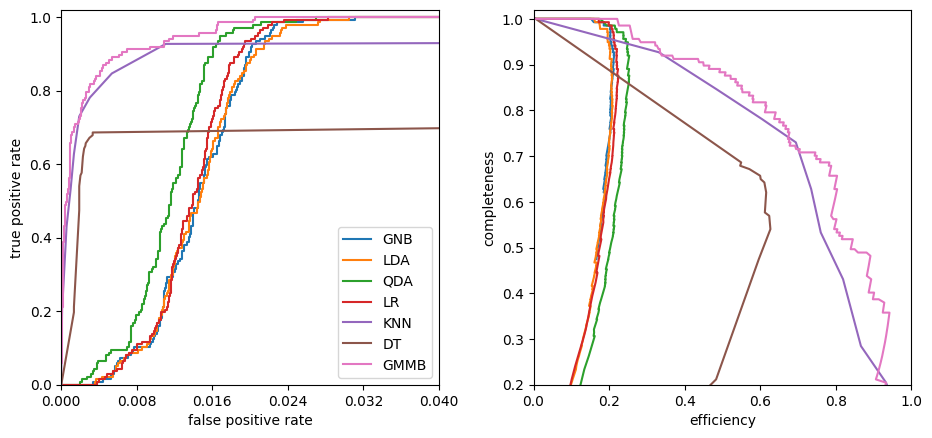

In [15]:
#------------------------------------------------------------
# Fit all the models to the training data
def compute_models(*args):
    names = []
    probs = []
    for classifier, kwargs in args:
        print(classifier.__name__)
        clf = classifier(**kwargs)
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]

        names.append(classifier.__name__)
        probs.append(y_probs)

    return names, probs


names, probs = compute_models((GaussianNB, {}),
                              (LinearDiscriminantAnalysis, {}),
                              (QuadraticDiscriminantAnalysis, {}),
                              (LogisticRegression,
                               dict(class_weight='balanced')),
                              (KNeighborsClassifier,
                               dict(n_neighbors=10)),
                              (DecisionTreeClassifier,
                               dict(random_state=0, max_depth=12,
                                    criterion='entropy')),
                              (GMMBayes, dict(n_components=3, tol=1E-5,
                                              covariance_type='full')))

#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)


# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)

labels = dict(GaussianNB='GNB',
              LinearDiscriminantAnalysis='LDA',
              QuadraticDiscriminantAnalysis='QDA',
              KNeighborsClassifier='KNN',
              DecisionTreeClassifier='DT',
              GMMBayes='GMMB',
              LogisticRegression='LR')

thresholds = np.linspace(0, 1, 1001)[:-1]

# iterate through and show results
for name, y_prob in zip(names, probs):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=labels[name])

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=labels[name])

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0.2, 1.02)

plt.show()

## Linear and quadratic discriminant analysis

In [16]:
#----------------------------------------------------------------------
# perform LinearDiscriminantAnalysis
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

completeness [0.48175182 0.67153285 0.67153285 0.67153285]
contamination [0.85300668 0.80590717 0.80467091 0.80590717]


In [17]:
# perform QuadraticDiscriminantAnalysis
qclassifiers = []
qpredictions = []

for nc in Ncolors:
    qlf = QuadraticDiscriminantAnalysis()
    qlf.fit(X_train[:, :nc], y_train)
    qy_pred = qlf.predict(X_test[:, :nc])

    qclassifiers.append(qlf)
    qpredictions.append(qy_pred)

qpredictions = np.array(qpredictions)

qcompleteness, qcontamination = completeness_contamination(qpredictions, y_test)

print("completeness", qcompleteness)
print("contamination", qcontamination)

completeness [0.48175182 0.68613139 0.73722628 0.78832117]
contamination [0.85201794 0.79249448 0.77555556 0.75675676]


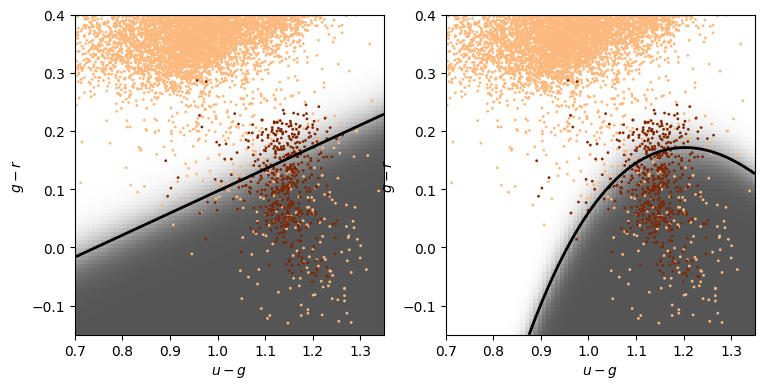

In [18]:
#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
qlf = qclassifiers[1]

xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))


Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

QZ = qlf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
QZ = QZ[:, 1].reshape(xx.shape)



#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# right plot: qda
ax = fig.add_subplot(122)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(QZ, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, QZ, [0.5], linewidths=2., colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')


plt.show()

## GMM and Bayes classification

completeness [[0.48175182 0.68613139 0.73722628 0.78832117]
 [0.         0.11678832 0.43065693 0.68613139]]
contamination [[0.85201794 0.79249448 0.77605322 0.75675676]
 [0.         0.33333333 0.14492754 0.21666667]]


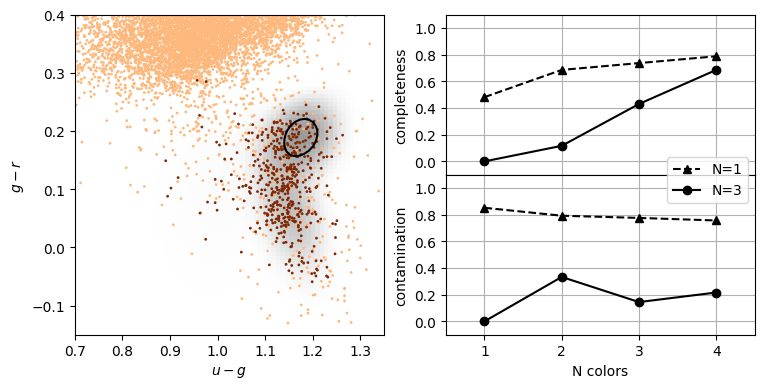

In [19]:
# GMM-bayes takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X_tr = X[::10]
#y_tr = y[::10]

#----------------------------------------------------------------------
# perform GMM Bayes
Ncolors = np.arange(1, X.shape[1] + 1)
Ncomp = [1, 3]


def compute_GMMbayes(Ncolors, Ncomp):
    classifiers = []
    predictions = []

    for ncm in Ncomp:
        classifiers.append([])
        predictions.append([])
        for nc in Ncolors:
            clf = GMMBayes(ncm, tol=1E-5, covariance_type='full')
            clf.fit(X_train[:, :nc], y_train)
            y_pred = clf.predict(X_test[:, :nc])

            classifiers[-1].append(clf)
            predictions[-1].append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_GMMbayes(Ncolors, Ncomp)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, completeness[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, contamination[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.78))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

## K-nearest neighbours

completeness [[0.13868613 0.3649635  0.46715328 0.54014599]
 [0.00729927 0.23357664 0.40145985 0.53284672]]
contamination [[0.85606061 0.54954955 0.44347826 0.41732283]
 [0.875      0.44827586 0.24657534 0.23958333]]


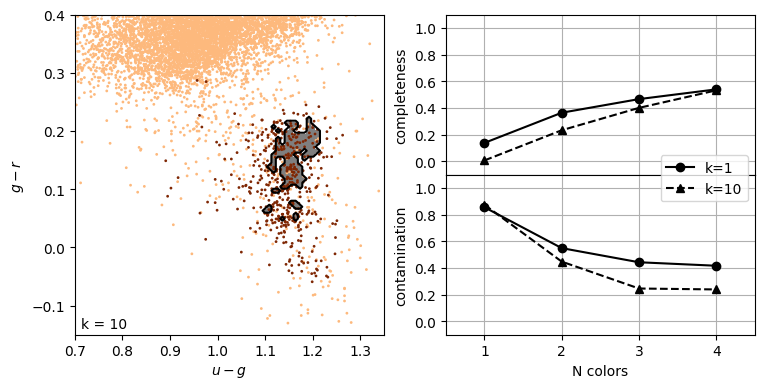

In [20]:
#----------------------------------------------------------------------
# perform Classification

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
kvals = [1, 10]

for k in kvals:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "k = %i" % kvals[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, completeness[1], '^--k', ms=6, label='k=%i' % kvals[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, contamination[1], '^--k', ms=6, label='k=%i' % kvals[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

## Support Vector Machines

completeness [1. 1. 1. 1.]
contamination [0.90108303 0.83901293 0.83573141 0.81561238]


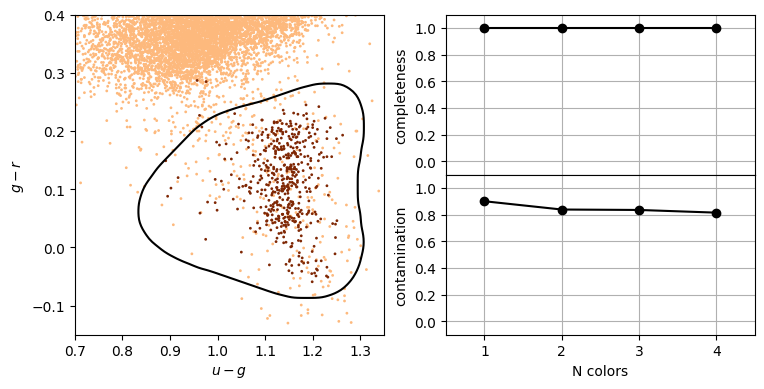

In [21]:
# SVM takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X_tr = X[::5]
#y_tr = y[::5]


#----------------------------------------------------------------------
# Fit Kernel SVM
Ncolors = np.arange(1, X.shape[1] + 1)

def compute_SVM(Ncolors):
    classifiers = []
    predictions = []

    for nc in Ncolors:
        # perform support vector classification
        clf = SVC(kernel='rbf', gamma=20.0, class_weight='balanced')
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_SVM(Ncolors)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101),
                     np.linspace(ylim[0], ylim[1], 101))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

# smooth the boundary
from scipy.ndimage import gaussian_filter
Z = gaussian_filter(Z, 2)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.Oranges, zorder=2)
im.set_clim(-0.5, 1)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

## Gaussian Naive Bayes

In [22]:
from astroML.datasets import fetch_imaging_sample

def get_stars_and_galaxies(Nstars=10000, Ngals=10000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample()

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    
    galaxies = data[objtype == 3][:Ngals]

    return np.concatenate([stars,galaxies]), np.concatenate([np.zeros(len(stars)), np.ones(len(galaxies))])

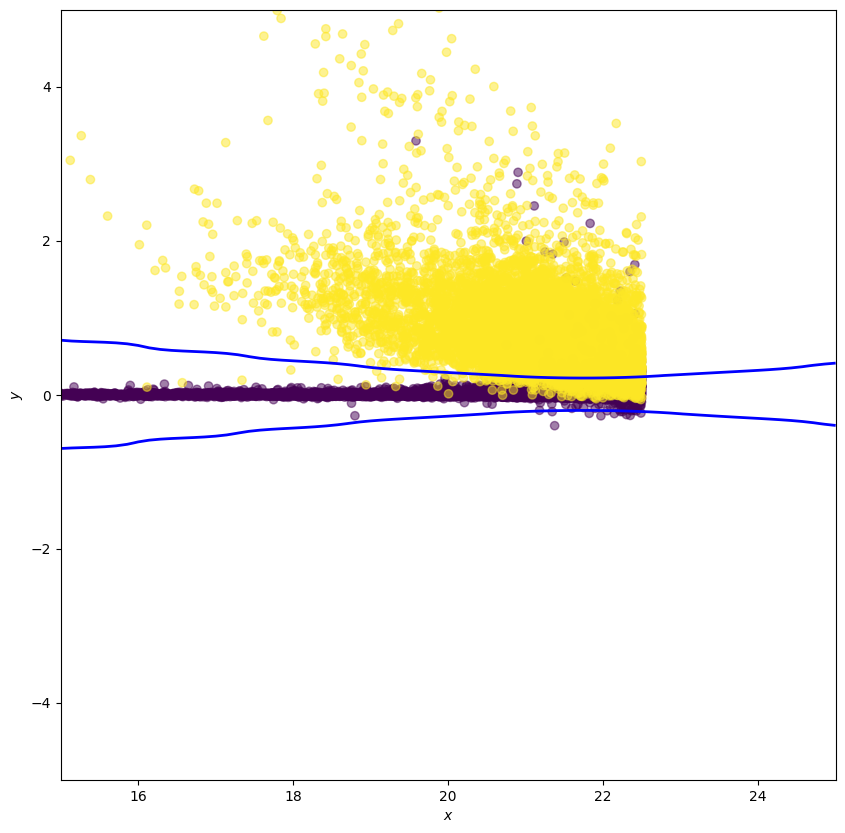

In [23]:
data, y = get_stars_and_galaxies(Nstars=10000, Ngals=10000)

# select r model mag and psf - model mag as columns
X = np.column_stack((data['rRaw'], data['rRawPSF'] - data['rRaw']))

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (15, 25)
ylim = (-5, 5)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, zorder=2, alpha=0.5)

ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='blue')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

# Conclusion
Didapatkan hasil sebagai berikut:
1. Akurasi klasifikasi model Quadratic Discriminant Analysis sebesar 98%
2. Akurasi klasifikasi model Gaussian Naive Bayes sebesar 98%
3. Akurasi klasifikasi model GMM and Bayes sebesar 95%
4. Akurasi klasifikasi model K-Nearest Neighbours sebesar 99%
5. Akurasi klasifikasi model Support Vector Machines sebesar 100%

Sehingga, kesimpulannya adalah model Support Vector Machines merupakan algoritma klasifikasi non-linear yang paling cocok digunakan pada dataset RR Lyrae.